In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
cd ../data/week1/

/data/week1


In [88]:
roit = pd.read_csv('roitman_data.csv')

In [13]:
roit.describe()

,count,time,trial,stimulus,coherence,choice,correct,unit,into_RF
count,514320.000000,514320.000000,514320.000000,514320.000000,514320.000000,514320.000000,514320.000000,514320.000000,514320.000000
mean,0.172638,515.156945,32.873931,78.699228,199.992845,1.480467,0.999199,436.765467,0.519533
std,0.408711,298.894114,20.906343,5.335917,182.042469,0.499619,0.028292,231.407327,0.499619
min,0.000000,0.000000,1.000000,71.000000,0.000000,1.000000,0.000000,107.000000,0.000000
25%,0.000000,255.000000,14.000000,74.000000,64.000000,1.000000,1.000000,124.000000,0.000000
50%,0.000000,515.000000,31.000000,76.000000,128.000000,1.000000,1.000000,593.000000,1.000000
75%,0.000000,775.000000,50.000000,84.000000,256.000000,2.000000,1.000000,607.000000,1.000000
max,3.000000,1040.000000,97.000000,86.000000,512.000000,2.000000,1.000000,627.000000,1.000000


In [4]:
for col in roit:
    print(col)
    print(np.sort(roit[col].unique()))
    print( )
'''
count = spk number in this 5 ms bin
time = 5 ms bins
trial = ?
stimulus = combo of position & dot motion direction
coherence = dot motion strength
choice = monkey saccade direction (corresponding to into_RF)
correct = monkey right or wrong 
unit = neuron being recorded
into_RF = monkey saccade direction (into vs away from RF)
'''

count
[0 1 2 3]

time
[   0    5   10   15   20   25   30   35   40   45   50   55   60   65
   70   75   80   85   90   95  100  105  110  115  120  125  130  135
  140  145  150  155  160  165  170  175  180  185  190  195  200  205
  210  215  220  225  230  235  240  245  250  255  260  265  270  275
  280  285  290  295  300  305  310  315  320  325  330  335  340  345
  350  355  360  365  370  375  380  385  390  395  400  405  410  415
  420  425  430  435  440  445  450  455  460  465  470  475  480  485
  490  495  500  505  510  515  520  525  530  535  540  545  550  555
  560  565  570  575  580  585  590  595  600  605  610  615  620  625
  630  635  640  645  650  655  660  665  670  675  680  685  690  695
  700  705  710  715  720  725  730  735  740  745  750  755  760  765
  770  775  780  785  790  795  800  805  810  815  820  825  830  835
  840  845  850  855  860  865  870  875  880  885  890  895  900  905
  910  915  920  925  930  935  940  945  950  955  960

'\ncount = spk number in this 5 ms bin\ntime = 5 ms bins\ntrial = ?\nstimulus = combo of position & dot motion direction\ncoherence = dot motion strength\nchoice = monkey saccade direction (corresponding to into_RF)\ncorrect = monkey right or wrong \nunit = neuron being recorded\ninto_RF = monkey saccade direction (into vs away from RF)\n'

<AxesSubplot:xlabel='unit', ylabel='trial'>

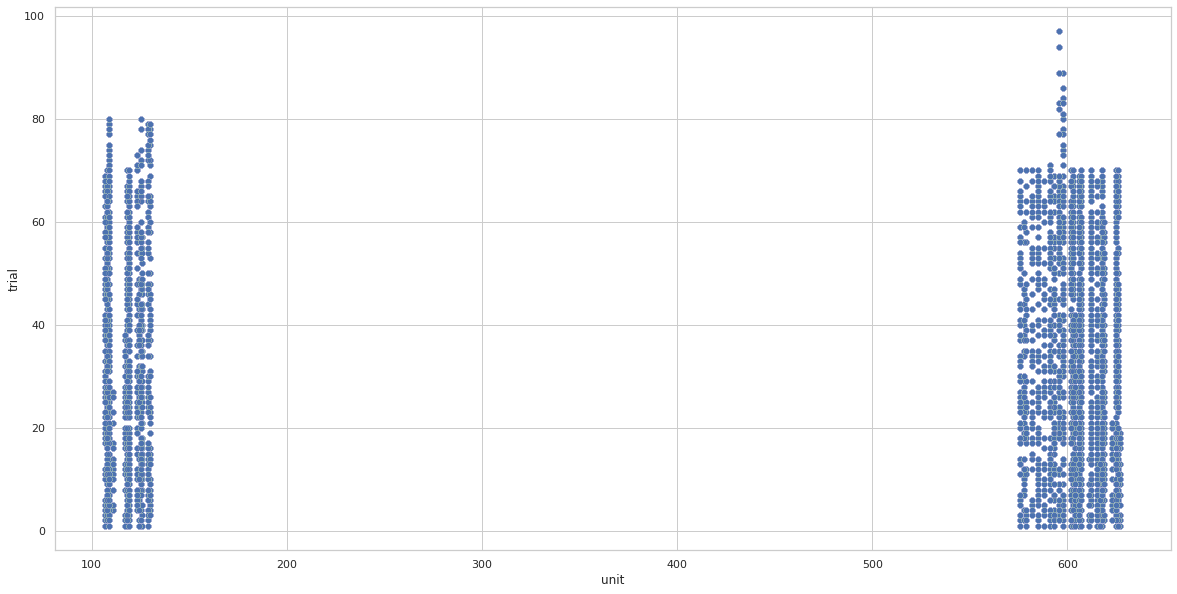

In [135]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

sns.scatterplot(data=roit, x="unit", y="trial", alpha=0.05)

In [131]:
rr = roit[['count','time','coherence','choice']]
rr = rr[rr.time <= 1000]
rr['fr'] = np.zeros_like(rr['time'])
rr

,count,time,coherence,choice,fr
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
513554,0,1000,0,2,0
513555,0,1000,0,2,0
513556,2,1000,0,2,0
513557,0,1000,0,2,0


In [144]:
tt = rr.groupby(['coherence','choice','time'])
groups = dict(list(tt))
re = pd.DataFrame(columns = rr.keys())

for key in groups.keys():
    chunk = groups[key].copy().reset_index()
    chunk_mean = pd.DataFrame(chunk.mean()).transpose()
    re = pd.concat([re, chunk_mean])
    
re = re.drop(columns=['index'])
re['fr'] = re['count'].rolling(12).mean() / 0.005
re['coherence'] = re['coherence'] / 10.0
re

,count,time,coherence,choice,fr
0,0.136986,0.0,0.0,1.0,NaN
0,0.150685,5.0,0.0,1.0,NaN
0,0.184932,10.0,0.0,1.0,NaN
0,0.123288,15.0,0.0,1.0,NaN
0,0.164384,20.0,0.0,1.0,NaN
...,...,...,...,...,...
0,0.112782,980.0,51.2,2.0,26.190476
0,0.127820,985.0,51.2,2.0,25.751880
0,0.090226,990.0,51.2,2.0,25.125313
0,0.131579,995.0,51.2,2.0,25.187970


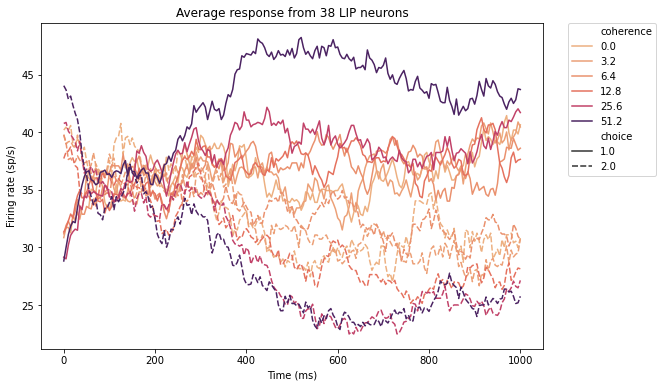

In [141]:
plt.figure(figsize=(9,6))
plt.title('Average response from 38 LIP neurons')
sns.lineplot(
    data=re,
    x="time", y="fr", hue="coherence", style="choice",
    palette="flare", legend="full"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Time (ms)');
plt.ylabel('Firing rate (sp/s)');